In [ ]:
# This reads in some FITS files and makes PNGs of the PSFs

# Created 2019 July 28 by E.S.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy.ma as ma
from matplotlib.colors import LogNorm
from scipy import misc, signal
from astropy.io import fits

In [10]:
image_tip, header = fits.getdata("images/lm_180507_007500.fits", 0, header=True)
image_tilt, header = fits.getdata("images/lm_180507_005120.fits", 0, header=True)
image_opd, header = fits.getdata("images/lm_180507_006000.fits", 0, header=True)
image_perfect, header = fits.getdata("images/lm_180507_009100.fits", 0, header=True)

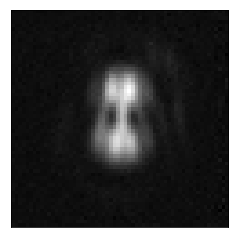

In [16]:
N = 30
frame1 = plt.gca()
plt.imshow(image_tip[339-N:339+N,806-N:806+N], origin="lower", cmap="gray")#, norm=LogNorm())
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig("images/aberr_tip.png")

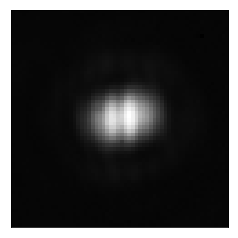

In [17]:
N = 30
frame1 = plt.gca()
plt.imshow(image_tilt[306-N:306+N,846-N:846+N], origin="lower", cmap="gray")#, norm=LogNorm())
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig("images/aberr_tilt.png")

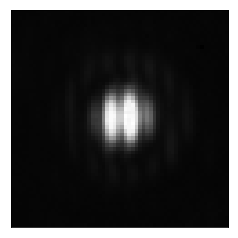

In [18]:
N = 30
frame1 = plt.gca()
plt.imshow(image_opd[309-N:309+N,846-N:846+N], origin="lower", cmap="gray")#, norm=LogNorm())
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig("images/aberr_opd.png")

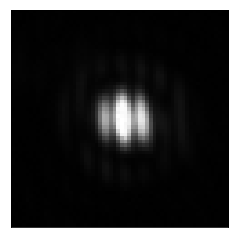

In [20]:
N = 30
frame1 = plt.gca()
plt.imshow(image_perfect[117-N:117+N,865-N:865+N], origin="lower", cmap="gray")#, norm=LogNorm())
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig("images/aberr_perfect.png")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN slice encountered
  """Entry point for launching an IPython kernel.


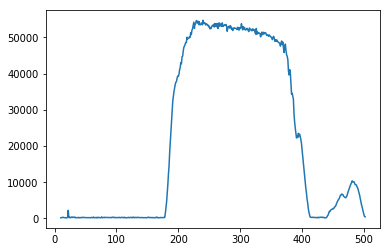

In [58]:
plt.plot(np.nanmax(image[:,500:1000], axis=1))
plt.show()

In [22]:
cutout = image[232:429,801:830]
cutout = np.divide(cutout,np.max(cutout))

NameError: name 'image' is not defined

In [21]:
plt.imshow(cutout.T, origin="lower")
plt.show()

NameError: name 'cutout' is not defined

In [8]:
AmpPE, ArgPE = fft_img(cutout).fft(padding=0)

Size of array being FFTed:
(197, 29)


In [9]:
AmpPE_norm = np.divide(AmpPE,np.max(AmpPE))

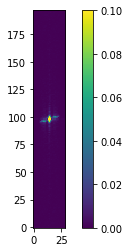

In [10]:
plt.imshow(AmpPE_norm, vmin=0, vmax=0.1, origin="lower")
plt.colorbar()
plt.show()

In [69]:
hdu = fits.PrimaryHDU(AmpPE_norm.data)
hdulist = fits.HDUList([hdu])
hdu.writeto('junk.fits', overwrite=True)

In [12]:
# try remapping

# the y-axis of the original image is proportional to lambda; get the coordinates
#lambda_scale = 

x = np.arange(np.shape(AmpPE_norm)[1])
y = np.arange(np.shape(AmpPE_norm)[0])
tau_1d = np.copy(x)
lambda_1d = np.copy(y)
tau_grid, lambda_grid = np.meshgrid(x, y)
lambda_grid = np.add(2.8,np.divide(lambda_grid,
                                   np.max(lambda_grid))*(4.2-2.8)) # not sure if this scaling is right

In [13]:
kappa_grid = np.divide(1.,lambda_grid)
phi_grid = np.multiply(kappa_grid,tau_grid)

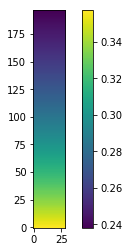

In [99]:
plt.imshow(kappa_grid, origin="lower")
plt.colorbar()
plt.show()

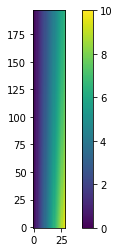

In [100]:
plt.imshow(phi_grid, origin="lower")
plt.colorbar()
plt.show()

In [115]:
np.min(lambda_grid)

2.8

In [ ]:
x_list = np.array([-1,2,10,3])
y_list = np.array([3,-3,4,7])
z_list = np.array([5,1,2.5,4.5])

In [108]:
tau_grid.flatten()

array([ 0,  1,  2, ..., 26, 27, 28])

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=5,5 m=5713 fp=1.765106 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


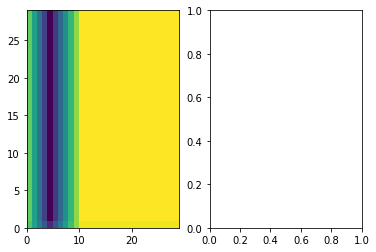

In [116]:
from scipy.interpolate import interp2d

# f will be a function with two arguments (x and y coordinates),
# but those can be array_like structures too, in which case the
# result will be a matrix representing the values in the grid 
# specified by those arguments
#f = interp2d(tau_grid,lambda_grid,AmpPE_norm,kind="linear")
f = interp2d(phi_grid,kappa_grid,AmpPE_norm,kind="linear")


x_coords = np.arange(0,np.shape(tau_grid)[1]+1)
y_coords = np.arange(0,np.shape(lambda_grid)[1]+1)

Z = f(x_coords,y_coords)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].pcolormesh(x_coords, y_coords, Z)

plt.show()

In [ ]:
x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

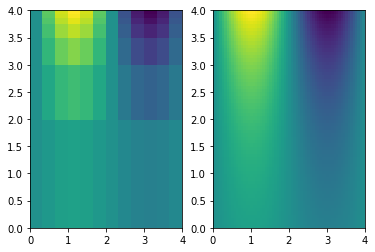

In [26]:
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 13)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X/2) * np.exp(Y/2)

x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z)

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2)

plt.show()

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=72,84 m=5713 fp=0.087199 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


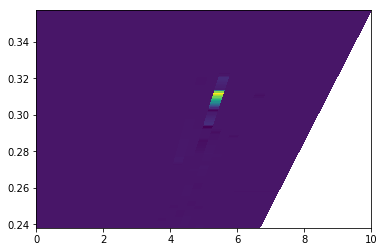

In [42]:
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt

X = np.add(1,tau_grid) # get rid of the zeros
Y = lambda_grid
Z = cutout

kappa_2d = np.divide(1.,lambda_grid)
phi_2d = np.divide(tau_grid,lambda_grid)

'''
x2 = np.linspace(0, len(tau_1d), num=200)
y2 = np.linspace(0, len(lambda_1d), num=200)
f = interp2d(tau_1d, lambda_1d, Z, kind='cubic')
Z2 = f(x2, y2)

'''
f = interp2d(phi_2d, kappa_2d, Z, kind='linear')

x2 = np.linspace(0, 5*np.pi, num=29)
y2 = np.linspace(np.min(kappa_2d), np.max(kappa_2d), num=197)
Z2 = f(x2, y2)

X2, Y2 = np.meshgrid(x2,y2)

plt.pcolormesh(phi_2d, kappa_2d, Z2)
plt.show()

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=55,110 m=5713 fp=0.296079 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


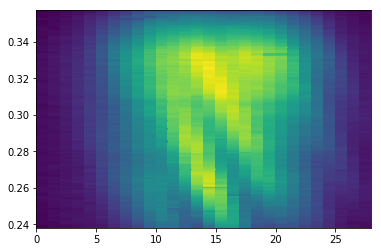

In [45]:
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt

X = np.add(1,tau_grid) # get rid of the zeros
Y = lambda_grid
Z = cutout

kappa_2d = np.divide(1.,lambda_grid)
phi_2d = np.divide(tau_grid,lambda_grid)

'''
x2 = np.linspace(0, len(tau_1d), num=200)
y2 = np.linspace(0, len(lambda_1d), num=200)
f = interp2d(tau_1d, lambda_1d, Z, kind='cubic')
Z2 = f(x2, y2)

'''
f = interp2d(tau_grid, kappa_2d, Z, kind='linear')

x2 = np.linspace(np.min(tau_grid), np.max(tau_grid), num=29)
y2 = np.linspace(np.min(kappa_2d), np.max(kappa_2d), num=197)
Z2 = f(x2, y2)

X2, Y2 = np.meshgrid(x2,y2)

plt.pcolormesh(tau_grid, kappa_2d, Z2)
plt.show()

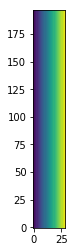

In [32]:
plt.imshow(tau_grid, origin="lower")
plt.show()

In [34]:
np.min(tau_grid)

0

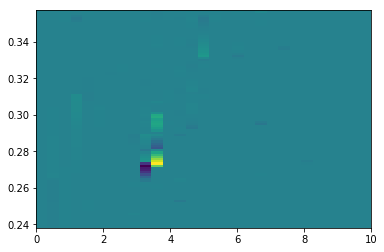

In [36]:
X2, Y2 = np.meshgrid(x2,y2)


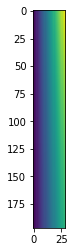

In [24]:
plt.imshow(phi_2d)
plt.show()

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=5,5 m=5713 fp=1.765106 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


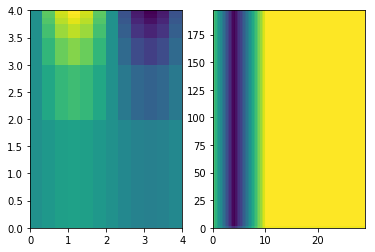

In [117]:
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 13)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X/2) * np.exp(Y/2)

x2 = np.linspace(0, np.shape(tau_grid)[1], 100)
y2 = np.linspace(0, np.shape(tau_grid)[0], 100)
#f = interp2d(tau_grid.flatten(),lambda_grid.flatten(),AmpPE_norm.flatten(),kind='linear')
f = interp2d(phi_grid.flatten(),kappa_grid.flatten(),AmpPE_norm.flatten(),kind='linear')
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z)

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2)

plt.show()

In [111]:
np.shape(tau_grid)[0]

197

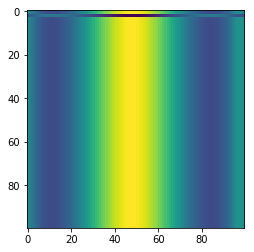

In [113]:
plt.imshow(Z2)
plt.show()